<a href="https://colab.research.google.com/github/hasiniranasinghe/machine-leraning/blob/master/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [90]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [91]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

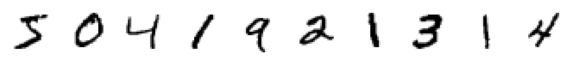

In [92]:
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

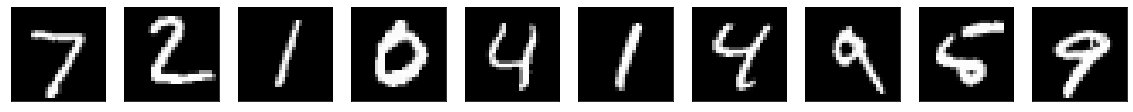

In [93]:
import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# add noice with 0.8 noice factor

In [59]:
noise_factor = 0.8
x_train_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape) 
x_test_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

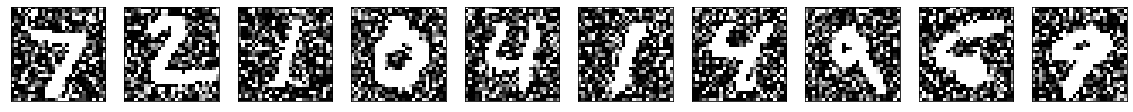

In [60]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [62]:
x_train_noisy = x_train_noisy.reshape((60000, 28, 28, 1))
x_train_noisy= x_train_noisy.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

x_test_noisy = x_test_noisy.reshape((10000, 28, 28, 1))
x_test_noisy= x_test_noisy.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = x_train_noisy[50000:]
validation_labels = train_labels[50000:]

x_train_noisy = x_train_noisy[:50000]
train_labels = train_labels[:50000]

history = model.fit(x_train_noisy, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 40s 798us/step - loss: 2.1767 - accuracy: 0.1958 - val_loss: 1.2837 - val_accuracy: 0.6115
Epoch 2/5
50000/50000 [==============================] - 40s 793us/step - loss: 0.7777 - accuracy: 0.7529 - val_loss: 0.5969 - val_accuracy: 0.8021
Epoch 3/5
50000/50000 [==============================] - 40s 794us/step - loss: 0.5092 - accuracy: 0.8395 - val_loss: 0.5339 - val_accuracy: 0.8283
Epoch 4/5
50000/50000 [==============================] - 40s 801us/step - loss: 0.3729 - accuracy: 0.8822 - val_loss: 0.2948 - val_accuracy: 0.9082
Epoch 5/5
50000/50000 [==============================] - 39s 790us/step - loss: 0.2781 - accuracy: 0.9125 - val_loss: 0.2769 - val_accuracy: 0.9145


In [63]:
test_loss, test_acc = model.evaluate(x_test_noisy, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 3s 273us/step
Accuracy: 0.9093999862670898
Loss:  0.28015032914876936


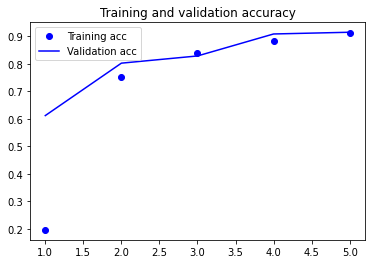

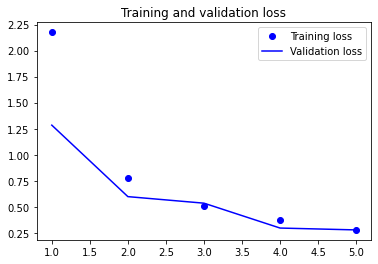

In [64]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
plot_accuracy_and_loss(history)

# add noice with 0.4 noice factor

In [83]:
noise_factor = 0.4
x_train_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape) 
x_test_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

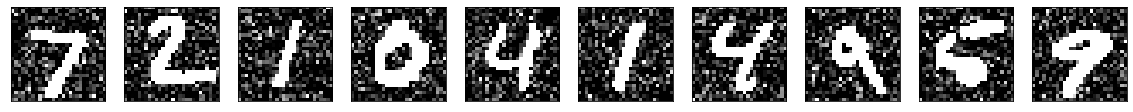

In [84]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [85]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [86]:
x_train_noisy = x_train_noisy.reshape((60000, 28, 28, 1))
x_train_noisy= x_train_noisy.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

x_test_noisy = x_test_noisy.reshape((10000, 28, 28, 1))
x_test_noisy= x_test_noisy.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = x_train_noisy[50000:]
validation_labels = train_labels[50000:]

x_train_noisy = x_train_noisy[:50000]
train_labels = train_labels[:50000]

history = model.fit(x_train_noisy, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 40s 805us/step - loss: 2.1676 - accuracy: 0.2002 - val_loss: 1.1744 - val_accuracy: 0.6392
Epoch 2/5
50000/50000 [==============================] - 40s 791us/step - loss: 0.7135 - accuracy: 0.7757 - val_loss: 0.5408 - val_accuracy: 0.8229
Epoch 3/5
50000/50000 [==============================] - 39s 789us/step - loss: 0.4358 - accuracy: 0.8631 - val_loss: 0.3467 - val_accuracy: 0.8937
Epoch 4/5
50000/50000 [==============================] - 40s 794us/step - loss: 0.3022 - accuracy: 0.9059 - val_loss: 0.2473 - val_accuracy: 0.9234
Epoch 5/5
50000/50000 [==============================] - 40s 796us/step - loss: 0.2301 - accuracy: 0.9275 - val_loss: 0.1898 - val_accuracy: 0.9424


In [87]:
test_loss, test_acc = model.evaluate(x_test_noisy, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 3s 281us/step
Accuracy: 0.9412000179290771
Loss:  0.18220032302886247


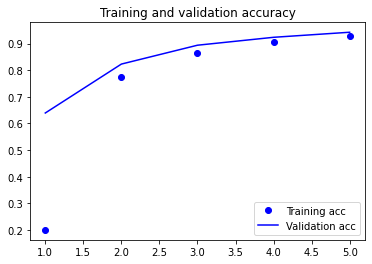

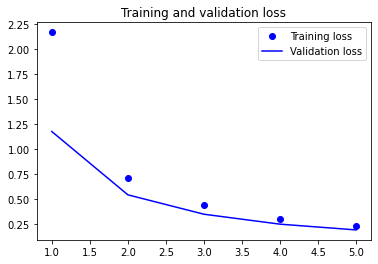

In [88]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
plot_accuracy_and_loss(history)

# add noice with 0.2 noice factor

In [94]:
noise_factor = 0.2
x_train_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape) 
x_test_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

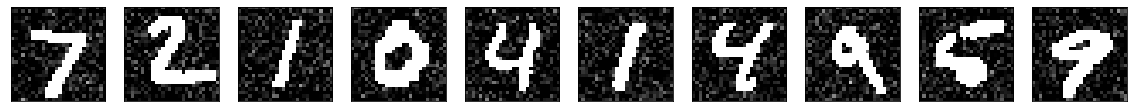

In [95]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [96]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [97]:
x_train_noisy = x_train_noisy.reshape((60000, 28, 28, 1))
x_train_noisy= x_train_noisy.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

x_test_noisy = x_test_noisy.reshape((10000, 28, 28, 1))
x_test_noisy= x_test_noisy.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = x_train_noisy[50000:]
validation_labels = train_labels[50000:]

x_train_noisy = x_train_noisy[:50000]
train_labels = train_labels[:50000]

history = model.fit(x_train_noisy, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 40s 809us/step - loss: 1.3825 - accuracy: 0.5249 - val_loss: 0.5609 - val_accuracy: 0.8160
Epoch 2/5
50000/50000 [==============================] - 40s 801us/step - loss: 0.4509 - accuracy: 0.8612 - val_loss: 0.4284 - val_accuracy: 0.8588
Epoch 3/5
50000/50000 [==============================] - 40s 794us/step - loss: 0.2878 - accuracy: 0.9116 - val_loss: 0.2508 - val_accuracy: 0.9222
Epoch 4/5
50000/50000 [==============================] - 43s 862us/step - loss: 0.1972 - accuracy: 0.9392 - val_loss: 0.1879 - val_accuracy: 0.9421
Epoch 5/5
50000/50000 [==============================] - 40s 804us/step - loss: 0.1473 - accuracy: 0.9542 - val_loss: 0.1400 - val_accuracy: 0.9620


In [98]:
test_loss, test_acc = model.evaluate(x_test_noisy, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 3s 281us/step
Accuracy: 0.9602000117301941
Loss:  0.13461907846480609


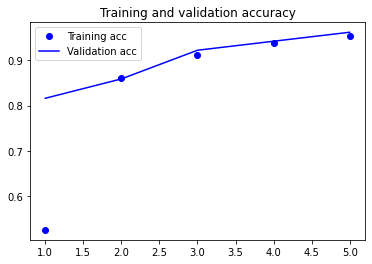

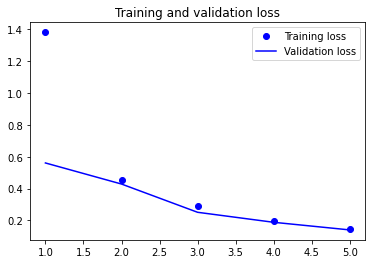

In [99]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
plot_accuracy_and_loss(history)